In [ ]:
!pip install lemon-explain[all]

  Using cached lemon_explain-0.1.1-py3-none-any.whl (26 kB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached py-entitymatching-0.4.2.tar.gz (2.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached pyarrow-5.0.0.tar.gz (739 kB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/Book1.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/Book1.csv')
df

,p_hours,w_1
0,0.50,0
1,0.75,0
2,1.00,0
3,2.00,0
4,3.00,1
5,4.00,0
6,5.00,1
7,5.50,1
8,4.50,1
9,3.50,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['p_hours']].values
y=df[['w_1']].values
x,y

(array([[0.5 ],
        [0.75],
        [1.  ],
        [2.  ],
        [3.  ],
        [4.  ],
        [5.  ],
        [5.5 ],
        [4.5 ],
        [3.5 ],
        [2.5 ],
        [3.75],
        [4.75],
        [5.75]]),
 array([[0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]]))

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12, 1), (2, 1), (12, 1), (2, 1))

In [ ]:
def sigmoid(x):
      return 1/(1 + np.exp(-x))

In [ ]:
def logistic_regression(x,w):
  y_hat=sigmoid(x@w)
  return y_hat

In [ ]:
def bce(y,y_hat):
  loss=-(np.mean(y*np.log(y_hat)+(1-y_hat)*np.log(1-y_hat)))
  return loss

In [ ]:
def gradient(x,y,y_hat):
  grads=(x.T@(y_hat-y))/len(y)
  return grads

In [ ]:
 def gradient_descent(w,eta,grads):
  w-=eta*grads
  return w

In [ ]:
def accuracy(y,y_hat):
  acc=np.sum(y==np.round(y_hat)/len(y))
  return acc

In [ ]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(12, 2)

In [ ]:
m=1
w=np.random.randn(m+1,1)
print(w.shape)
eta=0.01
n_epochs=2000

(2, 1)


In [ ]:
error_hist=[]
for epoch in range(n_epochs):
  y_hat=logistic_regression(x_train,w)
  e=bce(y_train,y_hat)
  error_hist.append(e)
  grads=gradient(x_train,y_train,y_hat)
  w=gradient_descent(w,eta,grads)
  if(epoch+1)%100==0:
    print(f'Epoch={epoch}, \t E={e:.4},\t w{w.T[0]}')

Epoch=99, 	 E=0.4949,	 w[-0.74782605  0.40545564]
Epoch=199, 	 E=0.4871,	 w[-0.85854257  0.43790734]
Epoch=299, 	 E=0.4811,	 w[-0.9645233   0.46676344]
Epoch=399, 	 E=0.4754,	 w[-1.0655763   0.49417986]
Epoch=499, 	 E=0.4699,	 w[-1.16199728  0.52040596]
Epoch=599, 	 E=0.4646,	 w[-1.25410038  0.54552892]
Epoch=699, 	 E=0.4595,	 w[-1.3421798   0.56961815]
Epoch=799, 	 E=0.4546,	 w[-1.42650739  0.59273765]
Epoch=899, 	 E=0.4499,	 w[-1.50733368  0.61494714]
Epoch=999, 	 E=0.4454,	 w[-1.58488923  0.63630228]
Epoch=1099, 	 E=0.4412,	 w[-1.65938607  0.65685482]
Epoch=1199, 	 E=0.4371,	 w[-1.7310192   0.67665283]
Epoch=1299, 	 E=0.4331,	 w[-1.79996793  0.6957409 ]
Epoch=1399, 	 E=0.4294,	 w[-1.86639722  0.71416036]
Epoch=1499, 	 E=0.4258,	 w[-1.93045896  0.73194953]
Epoch=1599, 	 E=0.4224,	 w[-1.99229304  0.74914394]
Epoch=1699, 	 E=0.4191,	 w[-2.0520285   0.76577652]
Epoch=1799, 	 E=0.4159,	 w[-2.10978443  0.78187784]
Epoch=1899, 	 E=0.4129,	 w[-2.16567088  0.79747627]
Epoch=1999, 	 E=0.41,	 

In [ ]:
y_hat = logistic_regression(np.random.randn(5, 2), np.random.randn(2, 1))
y_hat

array([[0.28557078],
       [0.62574758],
       [0.06851756],
       [0.19276073],
       [0.10112064]])

# **Problem 1**

**1-2**

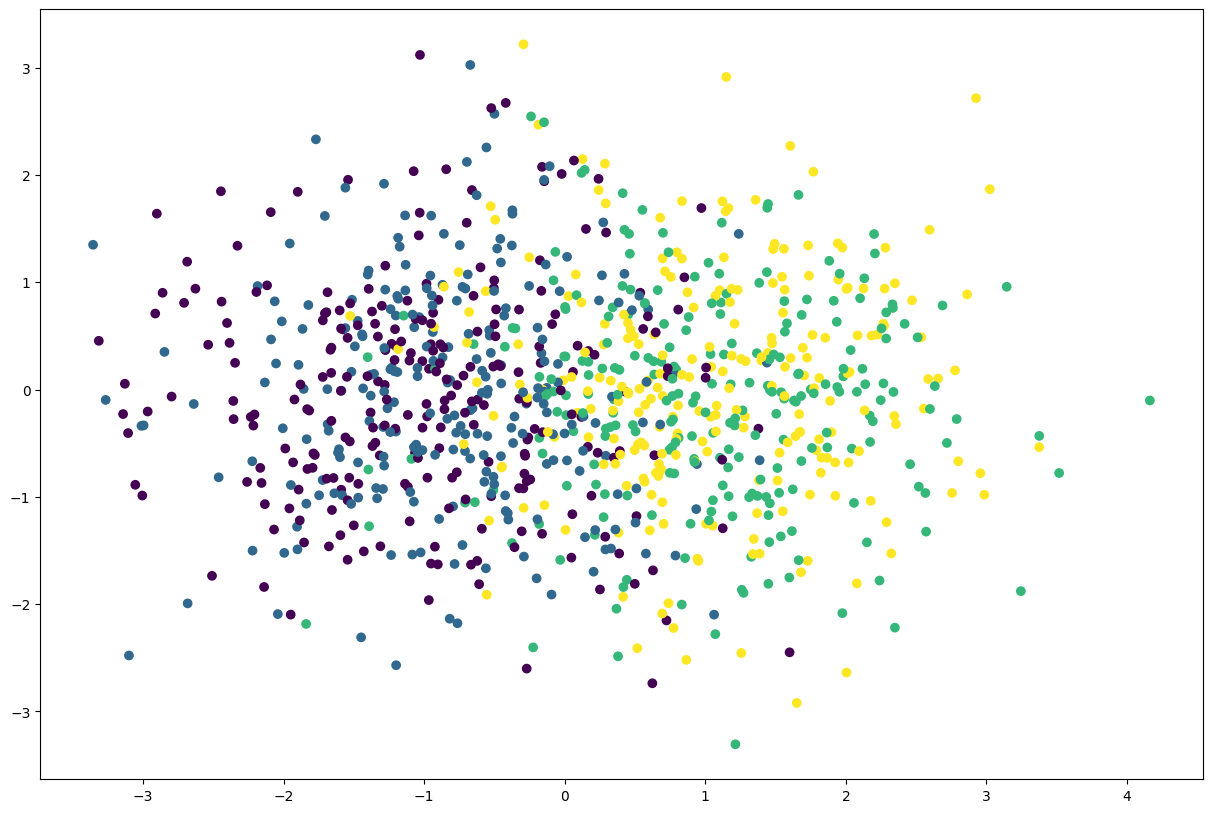

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier ,RidgeClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0, n_clusters_per_class=1, class_sep=1,  n_classes=4, random_state = 94)
plt.scatter(X[:, 0], X[:, 1], c=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 94)


**1-3**

In [ ]:
# Initialize logistic regression classifier with cross-validation
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)

# Wrap logistic regression model with OneVsRestClassifier
model_logistic = OneVsRestClassifier(logistic_cv)

# Train the classifier
model_logistic.fit(X_train, y_train)

# Make predictions
y_pred = model_logistic.predict(X_test)

# Evaluate the classifier
logistic_score_train = model_logistic.score(X_train, y_train)
logistic_score_test = model_logistic.score(X_test, y_test)

print("Logistic Regression CV Training Accuracy:", logistic_score_train)
print("Logistic Regression CV Testing Accuracy:", logistic_score_test)


Logistic Regression CV Training Accuracy: 0.84875
Logistic Regression CV Testing Accuracy: 0.83


In [ ]:

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
# Initialize classifiers
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)


model_logistic1 = OneVsOneClassifier(logistic_cv)


# Train classifiers
model_logistic1.fit(X_train, y_train)


# Make predictions
y_pred = model_logistic1.predict(X_test)



# Evaluate classifiers
logistic_score11 = model_logistic1.score(X_train,y_train)
logistic_score22 = model_logistic1.score(X_test, y_test)

print("Logistic Regression Train CV Accuracy:", logistic_score11)
print("Logistic Regression Test CV Accuracy:", logistic_score22)



Logistic Regression Train CV Accuracy: 0.88375
Logistic Regression Test CV Accuracy: 0.895


In [ ]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=94)
model_sgd = OneVsRestClassifier(sgd_clf)
model_sgd.fit(X_train, y_train)
y_pred = model_sgd.predict(X_test)
sgd_score1 = model_sgd.score(X_train,y_train)
sgd_score2 = model_sgd.score(X_test, y_test)
print("SGDClassifier Train Accuracy::", sgd_score1)
print("SGDClassifier Test Accuracy::", sgd_score2)



SGDClassifier Train Accuracy:: 0.7575
SGDClassifier Test Accuracy:: 0.725


In [ ]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=94)
model_sgd1 = OneVsOneClassifier(sgd_clf)
model_sgd1.fit(X_train, y_train)
y_pred = model_sgd1.predict(X_test)
sgd_score11 = model_sgd1.score(X_train,y_train)
sgd_score22 = model_sgd1.score(X_test, y_test)

print("SGDClassifier Train Accuracy::", sgd_score11)

print("SGDClassifier Test Accuracy::", sgd_score22)


SGDClassifier Train Accuracy:: 0.85125
SGDClassifier Test Accuracy:: 0.845


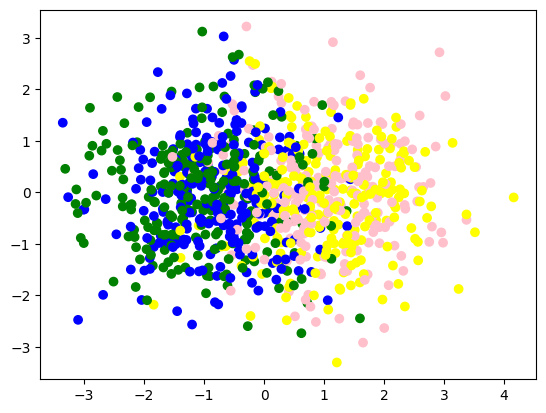

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
colors = np.array(['Green','blue', 'yellow','pink'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.show()


Accuracy: 0.795


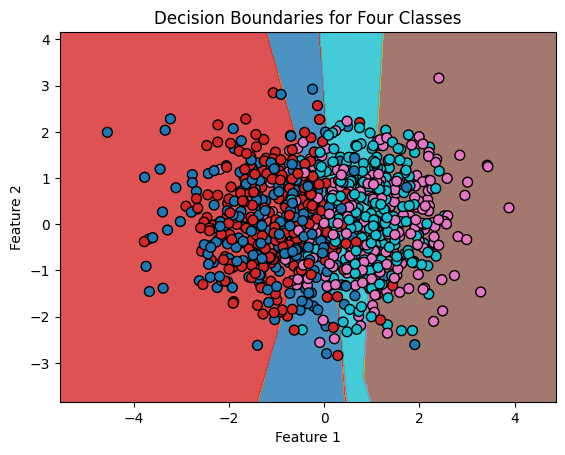

In [ ]:



# Generate synthetic data with four classes and three features
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1,
                           n_classes=4, random_state=94)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

# Train a logistic regression model
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)
model_logistic1 = OneVsOneClassifier(logistic_cv)
model_logistic1.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = model_logistic1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundaries
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
Z = model_logistic1.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Use model_logistic1 instead of model
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)  # Use tab10 color map
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.tab10, marker='o', s=50)  # Use tab10 color map and change marker style
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Four Classes')
plt.show()


**1-4**

In [ ]:
!pip install drawdata

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from drawdata import ScatterWidget


In [ ]:
 pip install pandas polars

In [ ]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
# Get the drawn data as a list of dictionaries
widget.data
pd = widget.data_as_pandas
# Get the drawn data as a dataframe
widget.data_as_polars

x,y,color,label
f64,f64,str,str
190.58156,385.543526,"""#1f77b4""","""a"""
181.101726,396.280781,"""#1f77b4""","""a"""
187.500884,342.757488,"""#1f77b4""","""a"""
210.709655,331.912476,"""#1f77b4""","""a"""
208.098362,290.958849,"""#1f77b4""","""a"""
205.854935,279.767165,"""#1f77b4""","""a"""
204.720673,270.695935,"""#1f77b4""","""a"""
203.604319,299.563733,"""#1f77b4""","""a"""
219.519179,290.902825,"""#1f77b4""","""a"""


x,y,color,label
f64,f64,str,str
190.58156,385.543526,"""#1f77b4""","""a"""
181.101726,396.280781,"""#1f77b4""","""a"""
187.500884,342.757488,"""#1f77b4""","""a"""
210.709655,331.912476,"""#1f77b4""","""a"""
208.098362,290.958849,"""#1f77b4""","""a"""
205.854935,279.767165,"""#1f77b4""","""a"""
204.720673,270.695935,"""#1f77b4""","""a"""
203.604319,299.563733,"""#1f77b4""","""a"""
219.519179,290.902825,"""#1f77b4""","""a"""


In [ ]:
X = pd[['x', 'y']].values
pd['label'] = pd['label'].replace({'a': 0, 'b': 1, 'c': 2,'d':3})
y = pd['label'].values
X,y

(array([[190.58156038, 385.54352603],
        [181.10172608, 396.28078062],
        [187.50088418, 342.75748769],
        ...,
        [638.51273968, 117.57585619],
        [628.6176724 , 133.15709684],
        [615.30216095, 107.39439278]]),
 array([0, 0, 0, ..., 2, 2, 2]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Initialize classifiers
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)


model_logistic = OneVsRestClassifier(logistic_cv)


# Train classifiers
model_logistic.fit(X_train, y_train)


# Make predictions
y_pred = model_logistic.predict(X_test)



# Evaluate classifiers
logistic_score1 = model_logistic.score(X_train,y_train)
logistic_score2 = model_logistic.score(X_test, y_test)


print("Logistic Regression CV Accuracy:", logistic_score1)
print("Logistic Regression CV Accuracy:", logistic_score2)




Logistic Regression CV Accuracy: 0.8175
Logistic Regression CV Accuracy: 0.78


In [ ]:
# Initialize classifiers
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)


model_logistic1 = OneVsOneClassifier(logistic_cv)


# Train classifiers
model_logistic1.fit(X_train, y_train)


# Make predictions
y_pred = model_logistic1.predict(X_test)



# Evaluate classifiers
logistic_score11 = model_logistic1.score(X_train,y_train)
logistic_score22 = model_logistic1.score(X_test, y_test)

print("Logistic Regression Train CV Accuracy:", logistic_score11)
print("Logistic Regression Test CV Accuracy:", logistic_score22)



Logistic Regression Train CV Accuracy: 0.83625
Logistic Regression Test CV Accuracy: 0.795


In [ ]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=94)
model_sgd = OneVsRestClassifier(sgd_clf)
model_sgd.fit(X_train, y_train)
y_pred = model_sgd.predict(X_test)
sgd_score1 = model_sgd.score(X_train,y_train)
sgd_score2 = model_sgd.score(X_test, y_test)
print("SGDClassifier Train Accuracy::", sgd_score1)
print("SGDClassifier Test Accuracy::", sgd_score2)



SGDClassifier Train Accuracy:: 0.71875
SGDClassifier Test Accuracy:: 0.685


In [ ]:
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=94)
model_sgd1 = OneVsOneClassifier(sgd_clf)
model_sgd1.fit(X_train, y_train)
y_pred = model_sgd1.predict(X_test)
sgd_score11 = model_sgd1.score(X_train,y_train)
sgd_score22 = model_sgd1.score(X_test, y_test)

print("SGDClassifier Train Accuracy::", sgd_score11)

print("SGDClassifier Test Accuracy::", sgd_score22)


SGDClassifier Train Accuracy:: 0.8325
SGDClassifier Test Accuracy:: 0.815


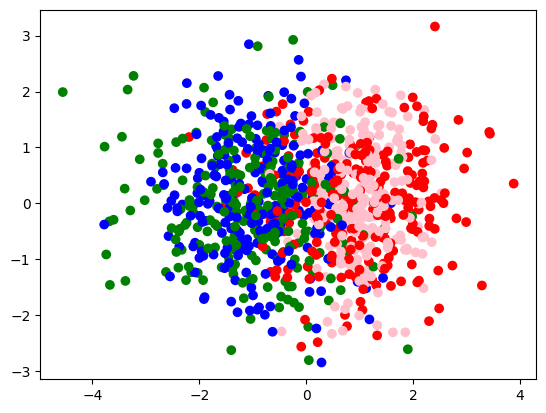

In [ ]:

colors = np.array(['Green','blue', 'red','pink'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.show()


Accuracy: 0.895


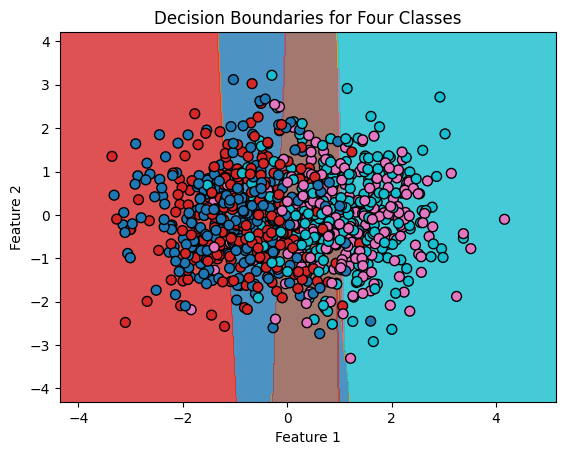

In [ ]:


# Generate synthetic data with four classes and three features
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1,
                           n_classes=4, random_state=94)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

# Train a logistic regression model
logistic_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=94)
model_logistic1 = OneVsOneClassifier(logistic_cv)
model_logistic1.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = model_logistic1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundaries
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
Z = model_logistic1.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])  # Use model_logistic1 instead of model
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)  # Use tab10 color map
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.tab10, marker='o', s=50)  # Use tab10 color map and change marker style
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Four Classes')
plt.show()


# **Problem 2**

**2-2 آ**

In [ ]:
pip install scipy

In [ ]:
!pip install gdown
!gdown 1hZGdUPSYMvGZv8jXd_JOcWcZTToyELDF
!gdown 1KKdrc_tr9PUbzlj_PH5tk8Hxs7AkYQFS

Downloading...
From (original): https://drive.google.com/uc?id=1hZGdUPSYMvGZv8jXd_JOcWcZTToyELDF
From (redirected): https://drive.google.com/uc?id=1hZGdUPSYMvGZv8jXd_JOcWcZTToyELDF&confirm=t&uuid=b912634d-5fe9-4e50-bd31-dd5ac72bbf10
To: /content/107.mat
100% 2.93M/2.93M [00:00<00:00, 26.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KKdrc_tr9PUbzlj_PH5tk8Hxs7AkYQFS
From (redirected): https://drive.google.com/uc?id=1KKdrc_tr9PUbzlj_PH5tk8Hxs7AkYQFS&confirm=t&uuid=c4aaae77-2302-4be5-91a3-f90d46829382
To: /content/99.mat
100% 15.5M/15.5M [00:00<00:00, 86.3MB/s]


In [ ]:
from scipy.io import loadmat
mat_data_fault = loadmat('/content/107.mat')
mat_data_normal = loadmat('/content/99.mat')
#40102094

In [ ]:
import numpy as np

In [ ]:
print(mat_data_fault.keys())
print(mat_data_normal.keys())
M = 100
N = 200
fault_data = mat_data_fault['X107_DE_time']
normal_data = mat_data_normal['X099_DE_time']
print("fault_data", fault_data.shape)
print("normal_data", normal_data.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X107_DE_time', 'X107_FE_time', 'X107_BA_time', 'X107RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])
fault_data (122136, 1)
normal_data (485063, 1)


In [ ]:
# Initialize an empty dictionary to store samples for the normal class
normal_data = {}

# Loop through the keys in mat_data_normal
for key in mat_data_normal.keys():
    # Check if the key ends with 'X097_DE_time'
    if key.endswith('X099_DE_time'):
        # Set class1 to the current key
        class1 = key
        normal_data[class1] = []  # Initialize an empty list to store samples for this class

        # Generate M samples of length N for this class
        sample = []
        for i in range(M):
            # Randomly select a start index within the valid range of the data associated with the key
            start_idx = np.random.randint(0, len(mat_data_normal[key]))

            # Extract a single sample of length N starting from the randomly generated start index
            single_sample = mat_data_normal[key][start_idx:start_idx + N]

            # Append the sample to the sample list
            sample.append(single_sample)

        # Store the list of samples for this class in the normal_data dictionary under the key class1
        normal_data[class1] = sample

# Convert the samples stored in normal_data dictionary into a matrix format
normal_class = np.vstack([np.array(sample) for sample in normal_data.values()])

# Reshape the normal_class matrix to remove any single-dimensional entries from its shape
normal_class = np.squeeze(normal_class)

# Print the shape of the normal_class matrix
print("Normal Matrix Shape:", normal_class.shape)

# Print the contents of the normal_class matrix
print("Normal Matrix:", normal_class)

Normal Matrix Shape: (100, 200)
Normal Matrix: [[ 0.06821723  0.02023569  0.008136   ... -0.00104308  0.05590892
   0.07906523]
 [-0.111192   -0.08490646 -0.02795446 ...  0.12642092  0.09450277
   0.02941477]
 [-0.00083446  0.01022215 -0.03817662 ...  0.00521538  0.01063938
   0.06675692]
 ...
 [ 0.04693846  0.05277969  0.04255754 ...  0.14206708  0.09554585
   0.08177723]
 [-0.07197231 -0.03504738 -0.04756431 ...  0.06154154  0.01835815
   0.03045785]
 [-0.043392   -0.01314277  0.024408   ... -0.02586831 -0.09742338
  -0.13184492]]


**2-2 ب**

In [ ]:
# Initialize an empty dictionary to store samples for the fault class
fault_data = {}

# Loop through the keys in mat_data_fault
for key in mat_data_fault.keys():
    # Check if the key ends with 'X105_DE_time'
    if key.endswith('X107_DE_time'):
        # Set class2 to the current key
        class2 = key
        fault_data[class2] = []  # Initialize an empty list to store samples for this class
         # Generate M samples of length N for this class
        sample2 = []
        for i in range(M):
            # Randomly select a start index within the valid range of the data associated with the key
            start_idx = np.random.randint(0, len(mat_data_fault[key])-N)
            # Extract a single sample of length N starting from the randomly generated start index
            single_sample2 = mat_data_fault[key][start_idx:start_idx + N]
            # Append the sample to the sample2 list
            sample2.append(single_sample2)

        # Store the list of samples for this class in the fault_data dictionary under the key class2
        fault_data[class2] = sample2

# Convert the samples stored in fault_data dictionary into a matrix format
fault_class = np.vstack([np.array(sample2) for sample2 in fault_data.values()])

# Reshape the fault_class matrix to remove any single-dimensional entries from its shape
fault_class = np.squeeze(fault_class)

# Print the shape of the fault_class matrix
print("fault Matrix Shape:", fault_class.shape)

# Print the contents of the fault_class matrix
print("fault Matrix:", fault_class)


fault Matrix Shape: (100, 200)
fault Matrix: [[ 7.53699002e-02 -4.19082635e-02 -1.68770100e-01 ...  1.63734611e-01
  -5.84766467e-02 -1.84363872e-01]
 [-1.20851737e-01  4.80807984e-02 -5.40584112e-01 ...  8.73900998e-02
   1.23450699e-02 -7.13090220e-02]
 [-3.94554930e-01  1.21176607e-01  3.06352655e-01 ... -1.09822391e+00
   2.24322914e-01  5.77619321e-01]
 ...
 [-3.24870259e-03  5.03548902e-03 -9.29128942e-02 ... -6.56237924e-02
   3.00017685e-01  1.60810778e-02]
 [-2.24485349e-01 -1.53826068e-01  5.99385629e-02 ...  3.44362475e-02
   2.24160479e-02 -2.75489980e-01]
 [-1.62435130e-04  1.57562076e-02  6.10756088e-02 ...  4.30453094e-02
   1.65034092e-01 -2.35530938e-02]]


In [ ]:
import numpy as np
from scipy.stats import kurtosis

# Define functions to compute required features
def compute_standard_deviation(data):
    return np.std(data)

def compute_peak(data):
    return np.max(data)

def compute_peak_to_peak(data):
    return np.max(data) - np.min(data)

def compute_kurtosis(data):
    return kurtosis(data)

def compute_mean(data):
    return np.mean(data)

def compute_root_mean_square(data):
    return np.sqrt(np.mean(data**2))

def compute_absolute_mean(data):
    return np.mean(np.abs(data))

def compute_impact_factor(data):
    return compute_peak(data) / compute_root_mean_square(data)

def compute_crest_factor(data):
    return compute_peak(data) / compute_root_mean_square(data)

def compute_clearance_factor(data):
    return compute_peak_to_peak(data) / (2 * compute_standard_deviation(data))

# Define function to extract features for each class
def extract_features(samples):
    features = []
    for sample in samples:
        std_dev = compute_standard_deviation(sample)
        peak = compute_peak(sample)
        peak_to_peak = compute_peak_to_peak(sample)
        kurt = compute_kurtosis(sample)
        mean = compute_mean(sample)
        rms = compute_root_mean_square(sample)
        abs_mean = compute_absolute_mean(sample)
        impact_factor = compute_impact_factor(sample)
        crest_factor = compute_crest_factor(sample)
        clearance_factor = compute_clearance_factor(sample)
        features.append([std_dev, peak, peak_to_peak, kurt, mean, rms, abs_mean, impact_factor, crest_factor, clearance_factor])
    return np.array(features)

# Extract features for normal and fault samples
normal_features = extract_features(normal_class)
fault_features = extract_features(fault_class)
print("Extracted Features Shape of Noraml class:", normal_features.shape)
print("Extracted Features Shape of Fault class:", fault_features .shape)

Extracted Features Shape of Noraml class: (100, 10)
Extracted Features Shape of Fault class: (100, 10)


**2-2 ج**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Shuffle the normal class data
normal_indices = np.arange(normal_class.shape[0])
np.random.shuffle(normal_indices)
shuffled_normal_class = normal_class[normal_indices]

# Shuffle the fault class data
fault_indices = np.arange(fault_class.shape[0])
np.random.shuffle(fault_indices)
shuffled_fault_class = fault_class[fault_indices]

# Create labels for normal and fault classes (0 for normal, 1 for fault)
normal_labels = np.zeros(shuffled_normal_class.shape[0])
fault_labels = np.ones(shuffled_fault_class.shape[0])

# Combine the shuffled data matrices and labels
X = np.vstack((shuffled_normal_class, shuffled_fault_class))
y = np.concatenate((normal_labels, fault_labels))

# Split the combined data into training and evaluation sets with a 80-20 ratio
x_train, x_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=94)

# Print the shapes of the training and evaluation sets
print("Training data shape:", x_train.shape)
print("Training label shape:", y_train.shape)
print("Evaluation data shape:", x_test.shape)
print("Evaluation label shape:", y_test.shape)


Training data shape: (160, 200)
Training label shape: (160,)
Evaluation data shape: (40, 200)
Evaluation label shape: (40,)


**2-2 د**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_eval_normalized = scaler.transform(x_test)

# Print the shapes of the normalized training and evaluation sets
print("Normalized Training set shape:", x_train_normalized.shape)
print("Normalized Evaluation set shape:", x_eval_normalized.shape)


Normalized Training set shape: (160, 200)
Normalized Evaluation set shape: (40, 200)


In [ ]:
from re import A

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
print(x_train.shape)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic regression model
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

# Binary cross-entropy loss
def bce(y, y_hat):
    loss = -(np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
    return loss

# Gradient calculation
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

# Gradient descent
def gradient_descent(w, eta, grads):
    w -= eta * grads
    return w

def accuracy(y,y_hat):
  acc=np.sum(y==np.round(y_hat))/len(y)
  return acc

def evaluate_performance(y_true, y_pred):
    tp = np.sum((np.round(y_pred) == 1) & (y_true == 1))
    fp = np.sum((np.round(y_pred) == 1) & (y_true == 0))
    fn = np.sum((np.round(y_pred) == 0) & (y_true == 1))

    accuracy = np.sum(y_true == np.round(y_pred)) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1


# Initialize weights
m = 199
w = np.random.randn(m + 1, 1)


# Learning rate and number of epochs
eta = 0.01
n_epochs = 2000



# Initialize weights
m = 199
w = np.random.randn(m + 1, 1)


# Learning rate and number of epochs
eta = 0.01
n_epochs = 2000


(160, 200)


In [ ]:
def evaluate_performance(y_true, y_pred):
    tp = np.sum((np.round(y_pred) == 1) & (y_true == 1))
    fp = np.sum((np.round(y_pred) == 1) & (y_true == 0))
    fn = np.sum((np.round(y_pred) == 0) & (y_true == 1))

    accuracy = np.sum(y_true == np.round(y_pred)) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1


# Initialize weights
m = 199
w = np.random.randn(m + 1, 1)


# Learning rate and number of epochs
eta = 0.01
n_epochs = 2000

In [ ]:
# Training loop
error_hist = []
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)
for epoch in range(n_epochs):
    y_hat = logistic_regression(x_train, w)
    e = bce(y_train, y_hat)
    error_hist.append(e)
    grads = gradient(x_train, y_train, y_hat)
    w = gradient_descent(w, eta, grads)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch={epoch}, Loss={e:.4f}, Weights={w.T[0]}')


Streaming output truncated to the last 5000 lines.
 -0.09595714 -1.13442529 -0.65462953 -1.81794226  0.09647571 -1.37440884
  2.20674205  0.24839635  0.66701725  0.4720495  -1.44414592  0.02046797
 -0.72110562  0.32323437  1.43412258 -0.6243009   1.2540917  -0.15301199
 -1.01095164  0.51310965  0.89215247  1.11850808 -0.33590084  0.21002572
 -0.50087114  1.16148219 -0.23747737 -0.80501213  0.37037148 -0.67749935
 -0.84955261 -0.0357473  -0.21712702  1.0244099   0.37672519  1.76022313
 -0.7088992   1.25983494 -0.39166507  0.8725745   0.6504199   0.09302969
  0.02477784 -1.13458158 -3.61121904  1.32747624  0.79686254 -1.14398798
  0.45780555  0.05685851 -0.50720262 -1.06108947 -0.68820926  2.21963613
  1.14958377 -0.64944589  0.39090968  0.56743285  0.0357763   1.64111981
 -0.25064211  1.08548904  0.16736703 -0.26730709 -1.69516278 -1.42026732
 -0.40600302 -0.18725649  1.26073109 -0.50507519 -0.29062328 -0.15110404
  0.60302643  0.26928133 -0.37604687 -0.62329891 -0.43733827 -0.27493749


Test Accuracy: 0.6000
Test Precision: 0.6190
Test Recall: 0.6190
Test F1 Score: 0.6190


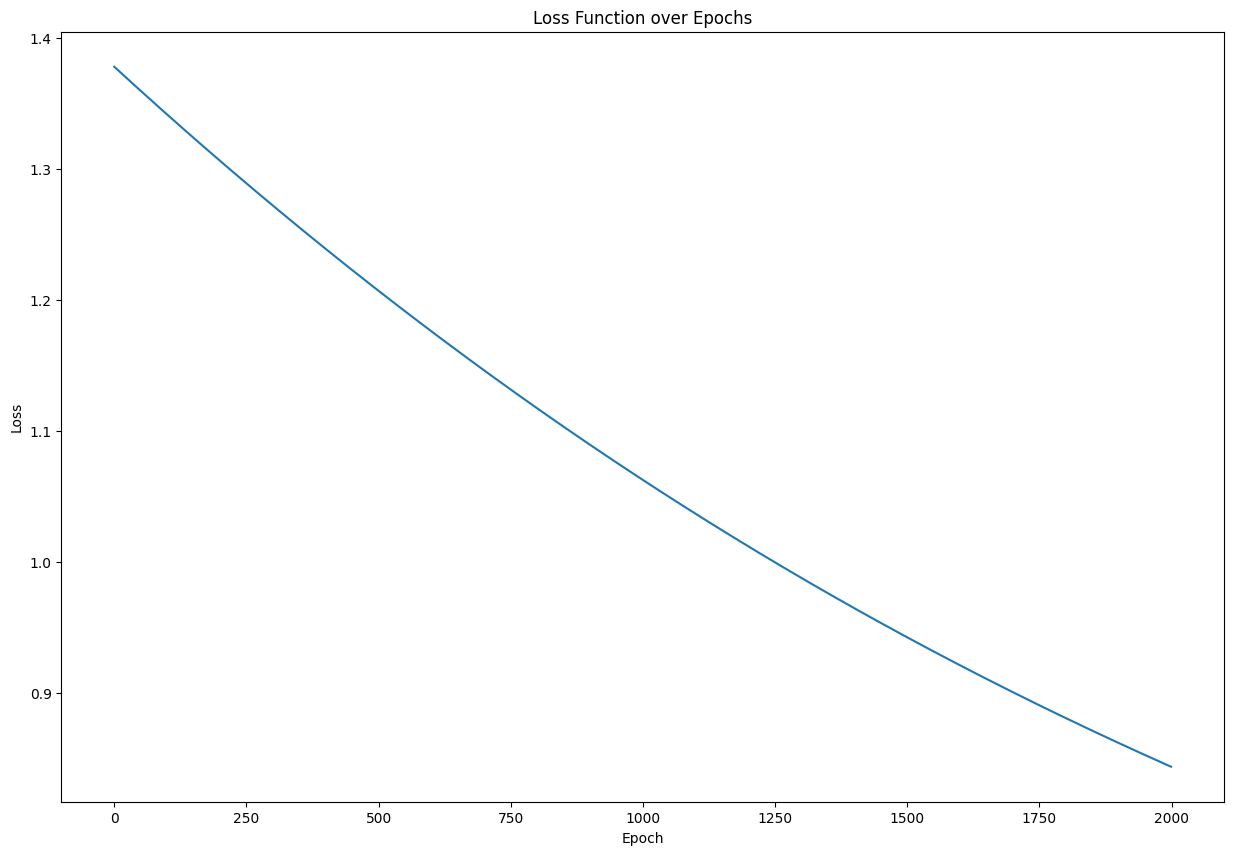

In [ ]:
import matplotlib.pyplot as plt

y_pred_test = np.round(logistic_regression(x_test, w))
accuracy_test, precision_test, recall_test, f1_test = evaluate_performance(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test:.4f}')
print(f'Test Precision: {precision_test:.4f}')
print(f'Test Recall: {recall_test:.4f}')
print(f'Test F1 Score: {f1_test:.4f}')

# Plot the loss function
plt.plot(range(n_epochs), error_hist)
plt.title('Loss Function over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
x_train.shape

(160, 200)

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
model=LogisticRegression(solver='sag', max_iter=2000, random_state=94)
model.fit(x_train,y_train)
model.predict(x_test),y_test

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]]))

In [ ]:
model.predict_log_proba(x_test),y_test

(array([[-6.34813629e-02, -2.78858169e+00],
        [-3.21620764e-01, -1.29088627e+00],
        [-3.55960638e-02, -3.35326545e+00],
        [-1.17958353e+00, -3.67312375e-01],
        [-1.86243513e-01, -1.77237715e+00],
        [-1.87910758e-01, -1.76427266e+00],
        [-3.72966864e-01, -1.16695982e+00],
        [-3.29374477e-01, -1.27073095e+00],
        [-3.32808097e+00, -3.65206947e-02],
        [-3.84956659e-01, -1.14093581e+00],
        [-1.05710482e+00, -4.26883321e-01],
        [-3.90195657e-01, -1.12986898e+00],
        [-3.66066920e-01, -1.18239526e+00],
        [-1.72455871e-01, -1.84260293e+00],
        [-7.53179444e-01, -6.36515602e-01],
        [-1.76989366e-01, -1.81885543e+00],
        [-9.28913225e-01, -5.02498283e-01],
        [-1.86358332e-01, -1.77181647e+00],
        [-2.71443762e-01, -1.43665399e+00],
        [-3.87675875e-01, -1.13516923e+00],
        [-3.35688641e-01, -1.25472465e+00],
        [-5.13194272e-01, -9.12748246e-01],
        [-3.68434381e-01, -1.177

In [ ]:
model.predict_proba(x_test),y_test

(array([[0.93849161, 0.06150839],
        [0.72497307, 0.27502693],
        [0.96503003, 0.03496997],
        [0.30740674, 0.69259326],
        [0.83007144, 0.16992856],
        [0.82868866, 0.17131134],
        [0.68868805, 0.31131195],
        [0.71937358, 0.28062642],
        [0.03586186, 0.96413814],
        [0.68048013, 0.31951987],
        [0.34746031, 0.65253969],
        [0.67692442, 0.32307558],
        [0.69345639, 0.30654361],
        [0.84159543, 0.15840457],
        [0.47086707, 0.52913293],
        [0.83778869, 0.16221131],
        [0.39498273, 0.60501727],
        [0.82997613, 0.17002387],
        [0.76227815, 0.23772185],
        [0.67863227, 0.32136773],
        [0.71484564, 0.28515436],
        [0.59858049, 0.40141951],
        [0.6918166 , 0.3081834 ],
        [0.75805132, 0.24194868],
        [0.81661992, 0.18338008],
        [0.69041576, 0.30958424],
        [0.0048815 , 0.9951185 ],
        [0.40890406, 0.59109594],
        [0.7857852 , 0.2142148 ],
        [0.725

In [ ]:
model.score(x_train,y_train)

0.9625

In [ ]:
model.score(x_test,y_test)

0.675

In [ ]:
from sklearn.linear_model import SGDClassifier
model1=SGDClassifier(loss='log_loss',random_state=50)
model1.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=50)

In [ ]:
model1.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=50)

In [ ]:
model1.predict(x_test),y_test

(array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.]),
 array([[1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]]))

In [ ]:
model1.score(x_train,y_train)

1.0

In [ ]:
model1.score(x_test,y_test)

0.7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Epoch = 99, 	 E = 0.0184
Epoch = 199, 	 E = 0.0227
Epoch = 299, 	 E = 0.0233
Epoch = 399, 	 E = 0.0236
Epoch = 499, 	 E = 0.0237
Epoch = 599, 	 E = 0.0238
Epoch = 699, 	 E = 0.0239
Epoch = 799, 	 E = 0.0239
Epoch = 899, 	 E = 0.024
Epoch = 999, 	 E = 0.024
Epoch = 1099, 	 E = 0.0241
Epoch = 1199, 	 E = 0.0241
Epoch = 1299, 	 E = 0.0241
Epoch = 1399, 	 E = 0.0241
Epoch = 1499, 	 E = 0.0241
Epoch = 1599, 	 E = 0.0241
Epoch = 1699, 	 E = 0.0242
Epoch = 1799, 	 E = 0.0242
Epoch = 1899, 	 E = 0.0242
Epoch = 1999, 	 E = 0.0242


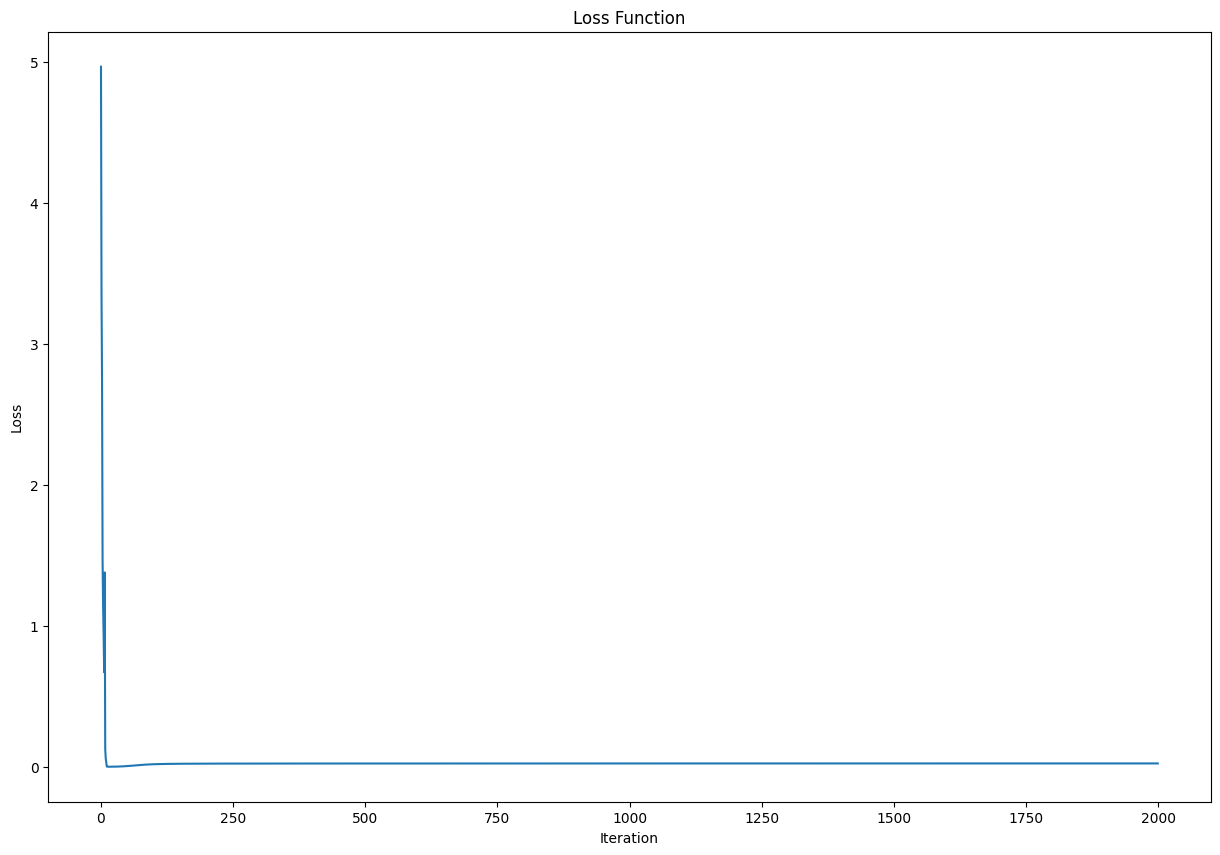

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Flatten y_train into a 1D array
y_train_flat = np.ravel(y_train)

# Define lists to store training loss values and iterations
error_hist = []

# Initialize the SGDClassifier model
model = SGDClassifier(loss='log', random_state=94)

# Training loop
num_iter = 2000
for epoch in range(num_iter):
    # Fit the model on the training data for one iteration
    model.partial_fit(x_train, y_train_flat, classes=np.unique(y_train_flat))

    # Predict probabilities for the training data
    y_hat = model.predict_proba(x_train)

    # Calculate the log loss (binary cross-entropy) for this iteration
    e = log_loss(y_train_flat, y_hat)
    error_hist.append(e)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch = {epoch}, \t E = {np.array2string(e, precision=4)}')

# Plot the loss function
plt.plot(error_hist)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()


# **Problem 3**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!pip install gdown
!gdown 1hc50YvZyHc2tU3vOHjbNBncvaSBgCFuP

Downloading...
From: https://drive.google.com/uc?id=1hc50YvZyHc2tU3vOHjbNBncvaSBgCFuP
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 61.4MB/s]


In [ ]:
df=pd.read_csv('/content/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=94)
x_train = x_train.reset_index(drop=True)

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

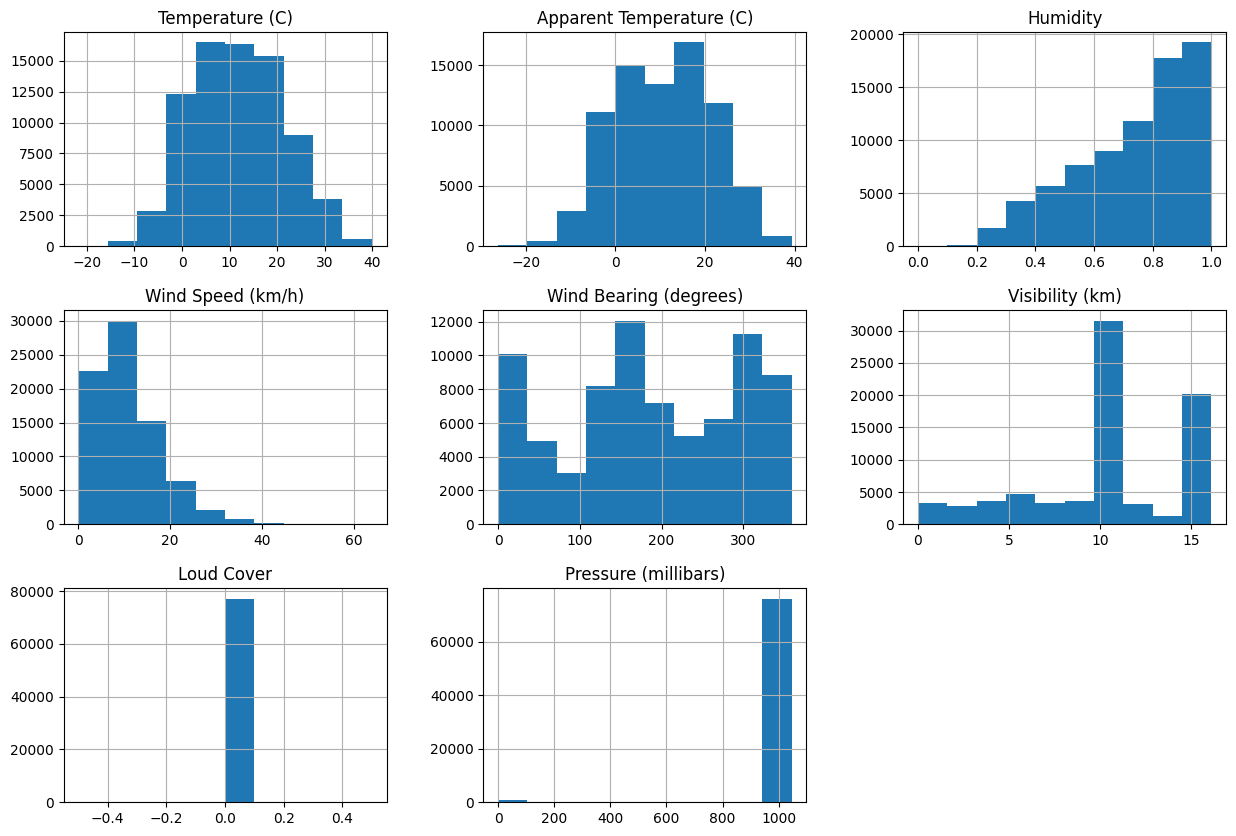

In [ ]:
plt.rcParams["figure.figsize"] = (15, 10)
x_train[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)','Loud Cover' ,'Pressure (millibars)']].hist()


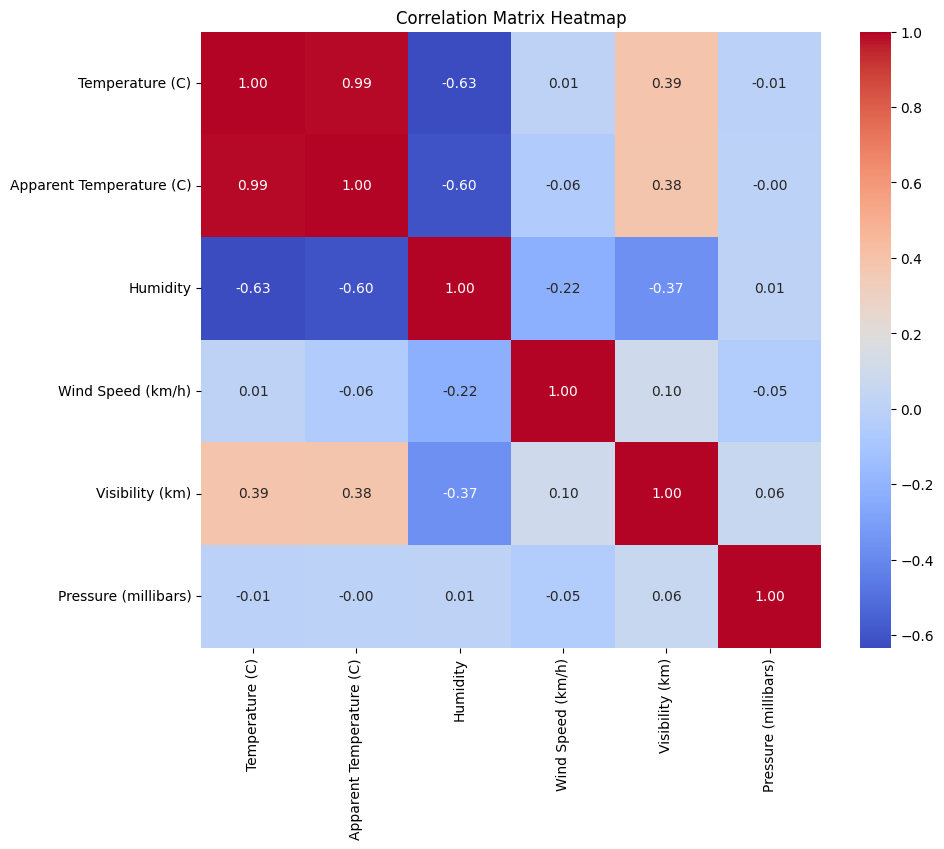

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = x_train[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()
from sklearn.preprocessing import StandardScaler


**Least square**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

Mean Squared Error: 54.761829807719856


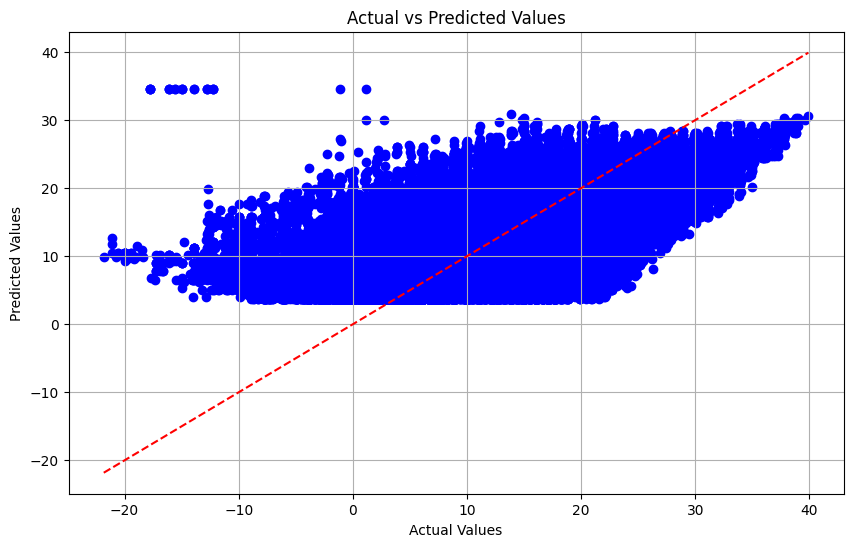

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called df with 'Humidity' and 'Temperature (C)' columns
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(df[['Humidity']])

# Transform the test data
x_test_scaled = scaler.transform(df[['Humidity']])

# Assign target variables
y_train_scaled = df['Temperature (C)']
y_test_scaled = df['Temperature (C)']


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegressionLS()
model.fit(x_train_scaled, y_train_scaled)

# Make predictions
y_pred = model.predict(x_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test_scaled,model.predict(x_test_scaled))
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred, color='blue')
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


**Recursive Least Squares**

In [ ]:
class RLS:
    def __init__(self, num_vars, lam, delta):
        '''
        num_vars: number of variables including constant
        lam: forgetting factor, usually very close to 1.
        '''
        self.num_vars = num_vars

        # delta controls the initial state.
        self.A = delta*np.matrix(np.identity(self.num_vars))
        self.w = np.matrix(np.zeros(self.num_vars))
        self.w = self.w.reshape(self.w.shape[1],1)

        # Variables needed for add_obs
        self.lam_inv = lam**(-1)
        self.sqrt_lam_inv = math.sqrt(self.lam_inv)

        # A priori error
        self.a_priori_error = 0

        # Count of number of observations added
        self.num_obs = 0

    def add_obs(self, x, t):
        '''
        Add the observation x with label t.
        x is a column vector as a numpy matrix
        t is a real scalar
        '''
        z = self.lam_inv*self.A*x
        alpha = float((1 + x.T*z)**(-1))
        self.a_priori_error = float(t - self.w.T*x)
        self.w = self.w + (t-alpha*float(x.T*(self.w+t*z)))*z
        self.A -= alpha*z*z.T
        self.num_obs += 1

    def fit(self, X, y):
        '''
        Fit a model to X,y.
        X and y are numpy arrays.
        Individual observations in X should have a prepended 1 for constant coefficient.
        '''
        for i in range(len(X)):
            x = np.transpose(np.matrix(X[i]))
            self.add_obs(x,y[i])


    def get_error(self):
        '''
        Finds the a priori (instantaneous) error.
        Does not calculate the cumulative effect
        of round-off errors.
        '''
        return self.a_priori_error

    def predict(self, x):
        '''
        Predict the value of observation x. x should be a numpy matrix (col vector)
        '''
        return float(self.w.T*x)

Mean Squared Error: 162.7798425687377


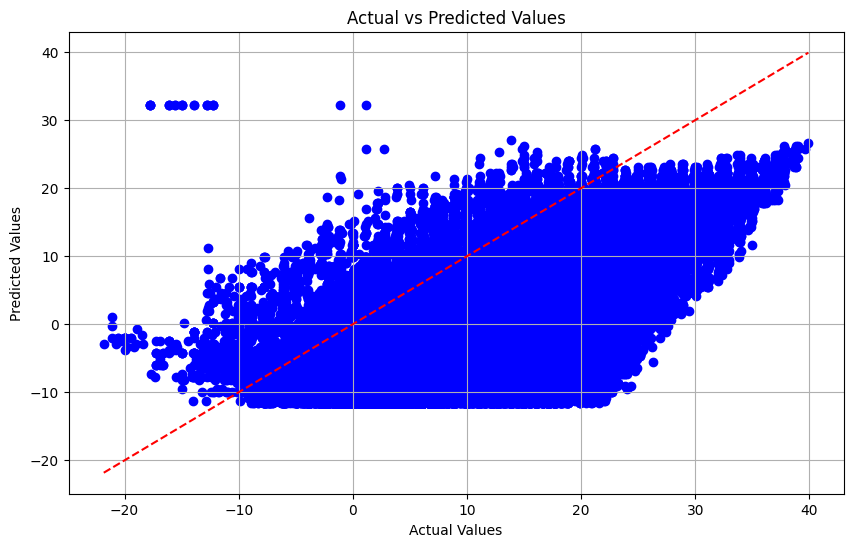

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=0.99):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]

            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)

x_train_scaled = np.array(x_train_scaled).reshape(-1, 1)
x_test_scaled = np.array(x_test_scaled).reshape(-1,1)
y_train_scaled = np.array(y_train_scaled).reshape(-1,1)
y_test_scaled = np.array(y_test_scaled).reshape(-1,1)
rls = RecursiveLeastSquares(n_features=x_train_scaled.shape[1])
errors = rls.fit(x_train_scaled, y_train_scaled)
y_pred = rls.predict(x_test_scaled)
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred, color='blue')
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()



**WLS**

In [ ]:
import numpy as np
import statsmodels.api as sm

error_variance = 2  # Modify this value based on your estimation

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Fit the weighted least squares model
X_with_intercept = sm.add_constant(x_train_scaled)  # Add intercept term
model = sm.WLS(y_train_scaled, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            WLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:19:20   Log-Likelihood:            -3.2991e+05
No. Observations:               96453   AIC:                         6.598e+05
Df Residuals:                   96451   BIC:                         6.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9327      0.024    500.786      0.0